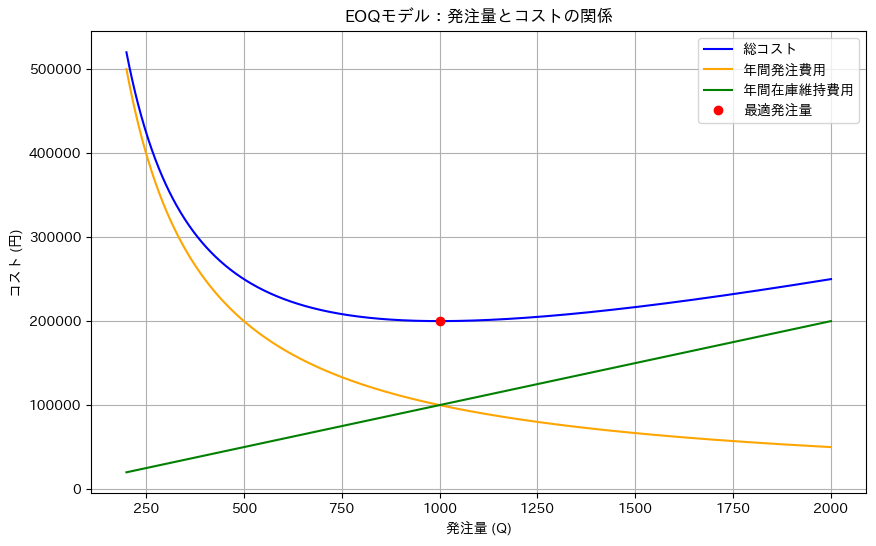

最適な発注量: 1000.00
最小総コスト: 200000.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib 

class EOQModel:
    def __init__(self, annual_demand, order_cost, holding_cost):
        self.D = annual_demand  # 年間需要
        self.K = order_cost     # 1回の注文にかかる固定費用
        self.h = holding_cost   # 1個あたりの年間保管コスト

    def total_cost(self, Q):
        return self.ordering_cost(Q) + self.holding_cost(Q)

    def ordering_cost(self, Q):
        return self.D / Q * self.K

    def holding_cost(self, Q):
        return Q / 2 * self.h

    def find_optimal_Q(self, Q_range):
        Q_values = np.linspace(*Q_range, 1000)
        total_costs = [self.total_cost(Q) for Q in Q_values]
        optimal_Q = Q_values[np.argmin(total_costs)]
        optimal_cost = np.min(total_costs)
        return optimal_Q, optimal_cost, Q_values, total_costs

    def plot_costs(self, Q_range=(200, 2000)):
        optimal_Q, optimal_cost, Q_values, total_costs = self.find_optimal_Q(Q_range)
        ordering_costs = [self.ordering_cost(Q) for Q in Q_values]
        holding_costs = [self.holding_cost(Q) for Q in Q_values]

        plt.figure(figsize=(10, 6))
        plt.plot(Q_values, total_costs, label='総コスト', color='blue')
        plt.plot(Q_values, ordering_costs, label='年間発注費用', color='orange')
        plt.plot(Q_values, holding_costs, label='年間在庫維持費用', color='green')
        plt.plot(optimal_Q, optimal_cost, 'ro', label='最適発注量')

        plt.xlabel('発注量 (Q)')
        plt.ylabel('コスト (円)')
        plt.title('EOQモデル：発注量とコストの関係')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"最適な発注量: {optimal_Q:.2f}")
        print(f"最小総コスト: {optimal_cost:.2f}")

eoq = EOQModel(annual_demand=10000, order_cost=10000, holding_cost=200)
eoq.plot_costs()
